In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/australian-bush-fire-satellite-data-nasa/fire_archive_V1_101674.csv
/kaggle/input/australian-bush-fire-satellite-data-nasa/fire_archive_M6_101673.csv
/kaggle/input/australian-bush-fire-satellite-data-nasa/Readme_nasa.txt
/kaggle/input/australian-bush-fire-satellite-data-nasa/fire_nrt_M6_101673.csv
/kaggle/input/australian-bush-fire-satellite-data-nasa/fire_nrt_V1_101674.csv


In [2]:
df_fire = pd.read_csv("/kaggle/input/australian-bush-fire-satellite-data-nasa/fire_archive_M6_101673.csv")
df_fire.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-12.3168,142.0542,311.4,4.2,1.9,2019-09-01,14,Terra,MODIS,23,6.3,297.0,40.2,D,0
1,-12.3407,142.0894,310.2,4.2,1.9,2019-09-01,14,Terra,MODIS,18,6.3,296.9,33.5,D,0
2,-12.3266,142.0863,310.1,4.2,1.9,2019-09-01,14,Terra,MODIS,27,6.3,296.7,36.0,D,0
3,-12.6649,142.6015,310.4,3.8,1.8,2019-09-01,14,Terra,MODIS,35,6.3,298.1,28.2,D,0
4,-12.8706,142.7663,314.3,3.6,1.8,2019-09-01,14,Terra,MODIS,56,6.3,299.4,43.5,D,0


In [3]:
df_fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148307 entries, 0 to 148306
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    148307 non-null  float64
 1   longitude   148307 non-null  float64
 2   brightness  148307 non-null  float64
 3   scan        148307 non-null  float64
 4   track       148307 non-null  float64
 5   acq_date    148307 non-null  object 
 6   acq_time    148307 non-null  int64  
 7   satellite   148307 non-null  object 
 8   instrument  148307 non-null  object 
 9   confidence  148307 non-null  int64  
 10  version     148307 non-null  float64
 11  bright_t31  148307 non-null  float64
 12  frp         148307 non-null  float64
 13  daynight    148307 non-null  object 
 14  type        148307 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 17.0+ MB


In [4]:
df_fire.shape

(148307, 15)

In [5]:
df_fire.columns.tolist()

['latitude',
 'longitude',
 'brightness',
 'scan',
 'track',
 'acq_date',
 'acq_time',
 'satellite',
 'instrument',
 'confidence',
 'version',
 'bright_t31',
 'frp',
 'daynight',
 'type']

In [6]:
with open("/kaggle/input/australian-bush-fire-satellite-data-nasa/Readme_nasa.txt", 'r') as f:
    content = f.read()
    print(content[:1500])

README: NASA FIRMS MODIS or VIIRS Fire/Hotspot Data Download

This zip file will have either one of the two naming conventions: 
    DL_FIRE_M6.xx if you requested MODIS data (M6 stands for MODIS Collection 6), or 
    DL_FIRE_V1.xx if you requested VIIRS 375m data

The xx refers to the download request id/number. The zip file contains the data
for the requested dates in your area-of-interest.

If you requested the data in shape file format you will see the following files
contained in your zip:
    fire_xx.dbf
    fire_xx.prj
    fire_xx.shp
    fire_xx.shx
    fire_xx.cpg
    Readme.txt

If you requested the data in CSV format the file name will look like this: 
    fire_.xx.csv
    Readme.txt

Depending on the date range selected you may receive 1 or 2 files containing
Near Real-Time (NRT) data and/or older standard/science quality data. NRT data
are replaced with standard quality data when they are available (usually with
a 2-3 month lag).

-- fire_nrt_M6_xx = MODIS NRT files:(MCD1

In [7]:
df_fire.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [8]:
df_fire.duplicated().sum()

0

In [9]:
df_fire['acq_time'] = df_fire['acq_time'].apply(lambda x: f"{int(x):04d}")


df_fire['datetime'] = pd.to_datetime(df_fire['acq_date'] + ' ' + df_fire['acq_time'], format='%Y-%m-%d %H%M')


df_fire[['datetime']].head()


,datetime
0,2019-09-01 00:14:00
1,2019-09-01 00:14:00
2,2019-09-01 00:14:00
3,2019-09-01 00:14:00
4,2019-09-01 00:14:00


In [10]:
df_fire['year'] = df_fire['datetime'].dt.year
df_fire['month'] = df_fire['datetime'].dt.month
df_fire['day'] = df_fire['datetime'].dt.day
df_fire['hour'] = df_fire['datetime'].dt.hour
df_fire['weekday'] = df_fire['datetime'].dt.day_name()


df_fire[['datetime', 'year', 'month', 'day', 'hour', 'weekday']].head()


,datetime,year,month,day,hour,weekday
0,2019-09-01 00:14:00,2019,9,1,0,Sunday
1,2019-09-01 00:14:00,2019,9,1,0,Sunday
2,2019-09-01 00:14:00,2019,9,1,0,Sunday
3,2019-09-01 00:14:00,2019,9,1,0,Sunday
4,2019-09-01 00:14:00,2019,9,1,0,Sunday


In [11]:
df_fire.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148307 entries, 0 to 148306
Data columns (total 21 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   latitude    148307 non-null  float64       
 1   longitude   148307 non-null  float64       
 2   brightness  148307 non-null  float64       
 3   scan        148307 non-null  float64       
 4   track       148307 non-null  float64       
 5   acq_date    148307 non-null  object        
 6   acq_time    148307 non-null  object        
 7   satellite   148307 non-null  object        
 8   instrument  148307 non-null  object        
 9   confidence  148307 non-null  int64         
 10  version     148307 non-null  float64       
 11  bright_t31  148307 non-null  float64       
 12  frp         148307 non-null  float64       
 13  daynight    148307 non-null  object        
 14  type        148307 non-null  int64         
 15  datetime    148307 non-null  datetime64[ns]
 16  ye

/tmp/ipykernel_13/2700050705.py:11: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


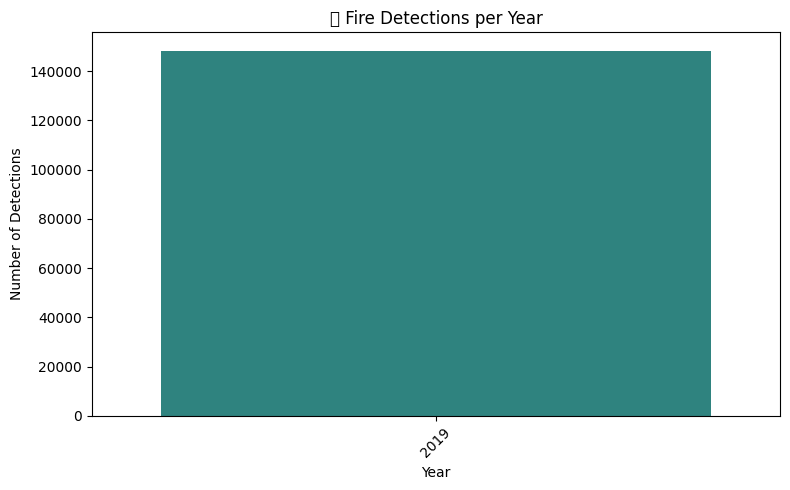

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 5))
sns.countplot(data=df_fire, x='year', palette='viridis')
plt.title("🔥 Fire Detections per Year")
plt.xlabel("Year")
plt.ylabel("Number of Detections")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_13/1209235770.py:6: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


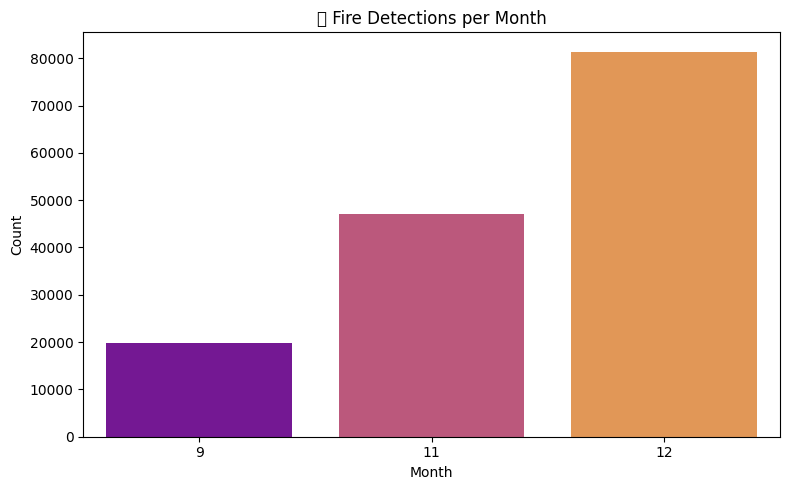

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_fire, x='month', palette='plasma')
plt.title("📆 Fire Detections per Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


/tmp/ipykernel_13/1229446117.py:6: UserWarning: Glyph 127774 (\N{SUN WITH FACE}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_13/1229446117.py:6: UserWarning: Glyph 127772 (\N{LAST QUARTER MOON WITH FACE}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127774 (\N{SUN WITH FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127772 (\N{LAST QUARTER MOON WITH FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


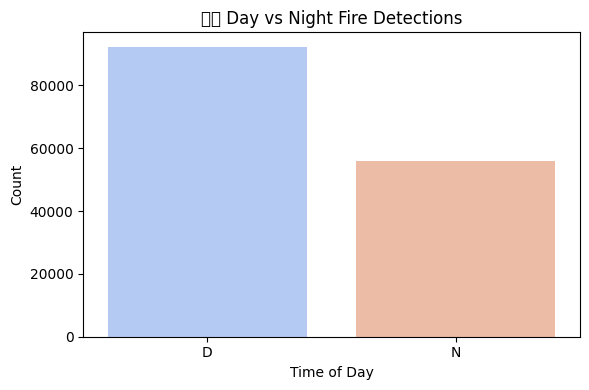

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_fire, x='daynight', palette='coolwarm')
plt.title("🌞🌜 Day vs Night Fire Detections")
plt.xlabel("Time of Day")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_13/448945828.py:6: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


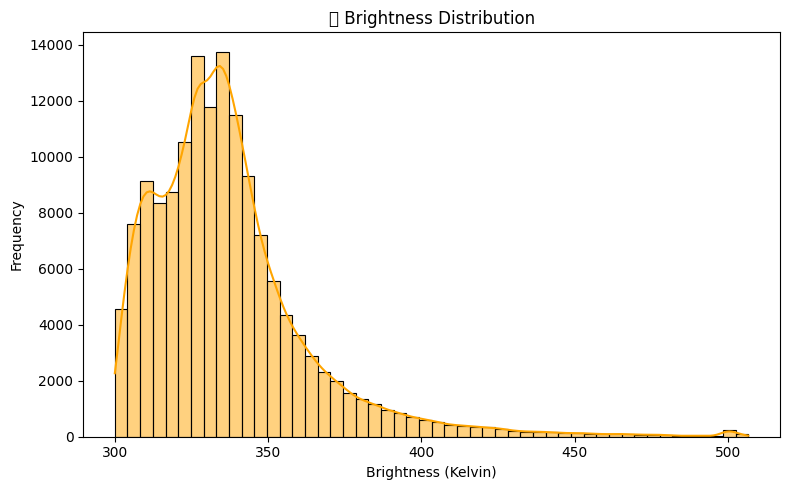

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df_fire, x='brightness', bins=50, kde=True, color='orange')
plt.title("🔥 Brightness Distribution")
plt.xlabel("Brightness (Kelvin)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_13/778265562.py:6: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


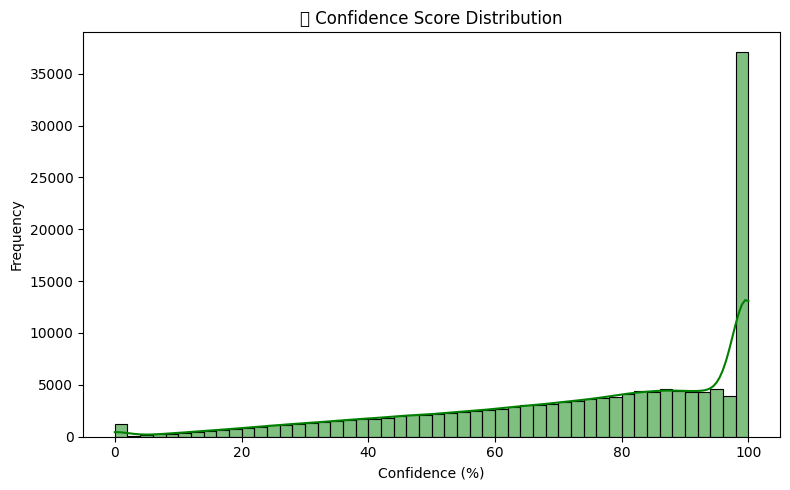

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df_fire, x='confidence', bins=50, kde=True, color='green')
plt.title("✅ Confidence Score Distribution")
plt.xlabel("Confidence (%)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


/tmp/ipykernel_13/276417747.py:6: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


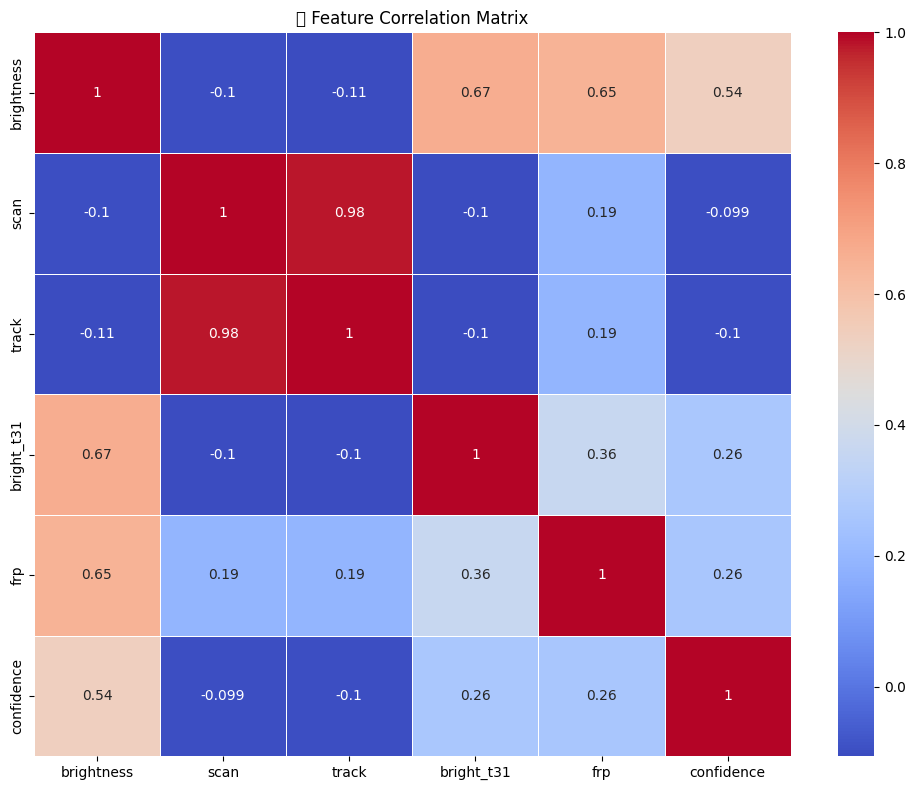

In [17]:
plt.figure(figsize=(10, 8))
correlation = df_fire[['brightness', 'scan', 'track', 'bright_t31', 'frp', 'confidence']].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("📊 Feature Correlation Matrix")
plt.tight_layout()
plt.show()


/tmp/ipykernel_13/2750538859.py:8: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


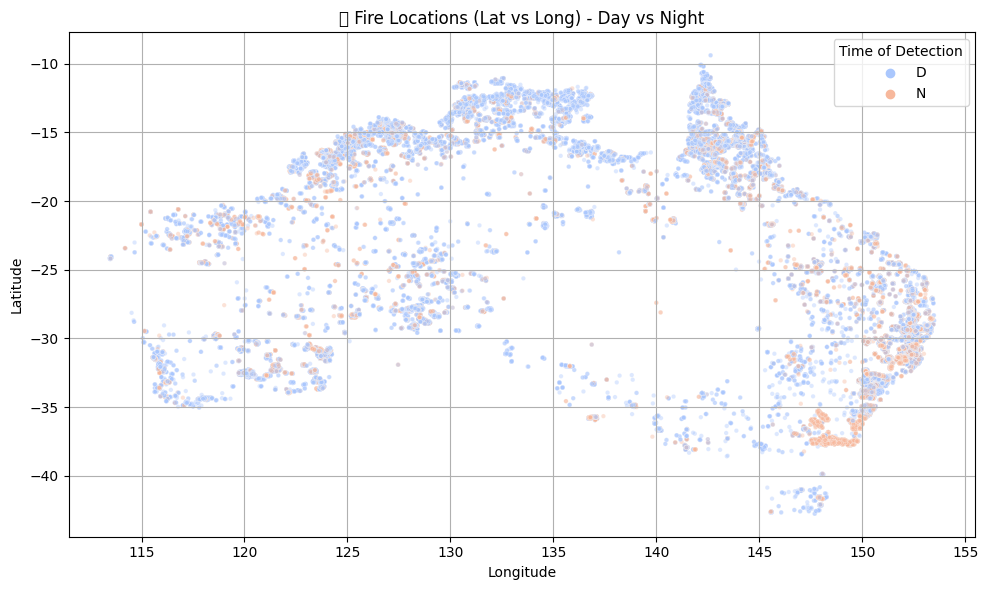

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_fire, x='longitude', y='latitude', hue='daynight', alpha=0.4, s=10, palette='coolwarm')
plt.title("🌍 Fire Locations (Lat vs Long) - Day vs Night")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Time of Detection")
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
import plotly.express as px

fig = px.scatter_geo(df_fire.sample(5000), 
                     lat='latitude', lon='longitude',
                     color='confidence',
                     hover_name='datetime',
                     projection="natural earth",
                     title="🔥 Global Fire Detections (Sample View)")
fig.show()


In [20]:
df_fire['daynight_encoded'] = df_fire['daynight'].map({'D': 1, 'N': 0})

df_fire['satellite_encoded'] = df_fire['satellite'].map({'Terra': 0, 'Aqua': 1})


In [21]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    else:
        return 'Spring'

df_fire['season'] = df_fire['month'].apply(get_season)


In [22]:
df_fire['lat_rounded'] = df_fire['latitude'].round(1)
df_fire['lon_rounded'] = df_fire['longitude'].round(1)

df_fire['region_id'] = df_fire['lat_rounded'].astype(str) + "_" + df_fire['lon_rounded'].astype(str)


In [23]:
def confidence_level(c):
    if c < 40:
        return 'Low'
    elif c < 80:
        return 'Medium'
    else:
        return 'High'

df_fire['confidence_level'] = df_fire['confidence'].apply(confidence_level)


In [24]:
df_fire[['datetime', 'brightness', 'confidence', 'confidence_level',
         'daynight', 'daynight_encoded', 'satellite', 'satellite_encoded',
         'season', 'region_id']].head()


,datetime,brightness,confidence,confidence_level,daynight,daynight_encoded,satellite,satellite_encoded,season,region_id
0,2019-09-01 00:14:00,311.4,23,Low,D,1,Terra,0,Spring,-12.3_142.1
1,2019-09-01 00:14:00,310.2,18,Low,D,1,Terra,0,Spring,-12.3_142.1
2,2019-09-01 00:14:00,310.1,27,Low,D,1,Terra,0,Spring,-12.3_142.1
3,2019-09-01 00:14:00,310.4,35,Low,D,1,Terra,0,Spring,-12.7_142.6
4,2019-09-01 00:14:00,314.3,56,Medium,D,1,Terra,0,Spring,-12.9_142.8


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


features = ['brightness', 'bright_t31', 'frp', 'scan', 'track', 'daynight_encoded', 
            'satellite_encoded', 'year', 'month', 'hour']
X = df_fire[features]
y = df_fire['confidence_level']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


📊 Classification Report:
              precision    recall  f1-score   support

        High       0.86      0.92      0.89     15222
         Low       0.58      0.31      0.40      3534
      Medium       0.72      0.76      0.74     10906

    accuracy                           0.79     29662
   macro avg       0.72      0.66      0.68     29662
weighted avg       0.78      0.79      0.78     29662



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.



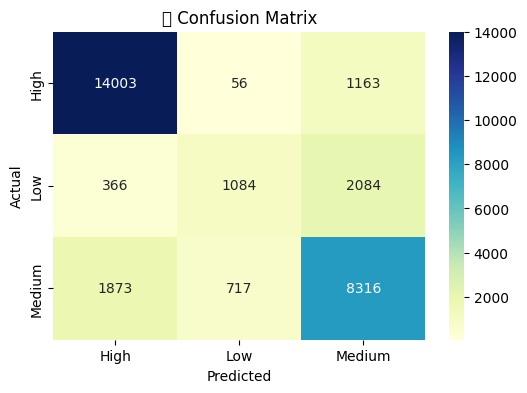

In [27]:
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)


print("📊 Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))


import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("📉 Confusion Matrix")
plt.show()


In [28]:
df_fire.to_csv("Australia-bush-fire.csv")